# 피트니스 자세 데이터 전처리

## keypoint 데이터 로드

In [36]:
import os
import pandas as pd
import numpy as np

In [37]:
test_single = np.load("561-1-3-27-Z115_C-0000004.jpg.npy")
test_single

array([[ 0.37174696,  0.64402461,  0.03077054,  0.99990571,  0.9999963 ],
       [ 0.36243665,  0.63687539,  0.00545352,  0.999892  ,  0.99999559],
       [ 0.3623119 ,  0.6341992 ,  0.00528762,  0.99989021,  0.99999619],
       [ 0.36219603,  0.63171291,  0.00540519,  0.99993193,  0.99999547],
       [ 0.36226666,  0.63705397,  0.03701873,  0.99990427,  0.99999285],
       [ 0.36200452,  0.63435543,  0.03680024,  0.99989128,  0.99999309],
       [ 0.36179465,  0.63159305,  0.03679571,  0.99992359,  0.99999189],
       [ 0.36320299,  0.61176616, -0.07606772,  0.99990392,  0.99999666],
       [ 0.36330682,  0.61200875,  0.06834321,  0.99980944,  0.99999249],
       [ 0.37864989,  0.6339556 ,  0.00682187,  0.99983406,  0.99999702],
       [ 0.37864763,  0.63437128,  0.04700251,  0.99971777,  0.99998939],
       [ 0.39690661,  0.5799762 , -0.16208142,  0.9999795 ,  0.99999559],
       [ 0.40382999,  0.5576551 ,  0.16110995,  0.99981397,  0.99997163],
       [ 0.42765403,  0.63408291, -0.2

Right arm:  [ 0.39690661  0.5799762  -0.16208142  0.9999795   0.99999559] [ 0.42765403  0.63408291 -0.298677    0.96195662  0.9998821 ] [ 0.41226372  0.70699018 -0.3555184   0.95219654  0.99999237]
Left arm:  [0.40382999 0.5576551  0.16110995 0.99981397 0.99997163] [0.42603487 0.59821671 0.31065267 0.00484799 0.9999578 ] [0.42216736 0.64407235 0.41214263 0.04539112 0.99999571]


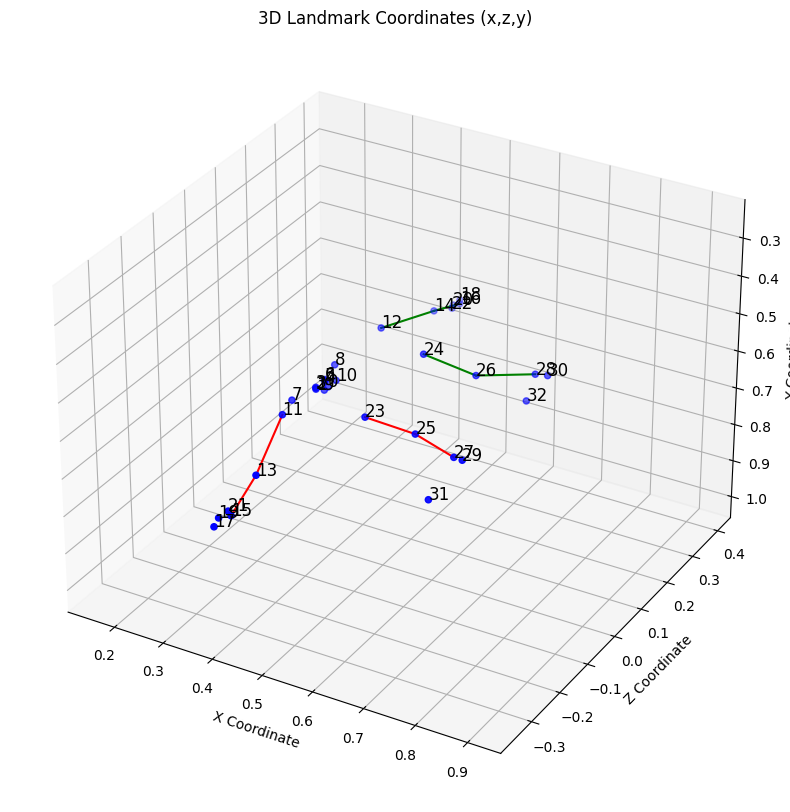

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]
hip_right = test_single[23]
knee_right = test_single[25]
ankle_right = test_single[27]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]
hip_left = test_single[24]
knee_left = test_single[26]
ankle_left = test_single[28]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,z_coords,y_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,z,y)')
ax.set_xlabel('X Coordinate')
ax.set_zlabel('Y Coordinate')
ax.set_ylabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_zlim(mid_y + max_range, mid_y - max_range)
ax.set_ylim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], z_coords[i], y_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Right leg lines (23-25 and 25-27)
x_line_rl1=[test_single[i][0] for i in [23,25]]
y_line_rl1=[test_single[i][1] for i in [23,25]]
z_line_rl1=[test_single[i][2] for i in [23,25]]

x_line_rl2=[test_single[i][0] for i in [25,27]]
y_line_rl2=[test_single[i][1] for i in [25,27]]
z_line_rl2=[test_single[i][2] for i in [25,27]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

# Left leg lines (24-26 and 26-28)
x_line_ll1=[test_single[i][0] for i in [24,26]]
y_line_ll1=[test_single[i][1] for i in [24,26]]
z_line_ll1=[test_single[i][2] for i in [24,26]]

x_line_ll2=[test_single[i][0] for i in [26,28]]
y_line_ll2=[test_single[i][1] for i in [26,28]]
z_line_ll2=[test_single[i][2] for i in [26,28]]

ax.plot(x_line_r1,z_line_r1,y_line_r1,c='r')
ax.plot(x_line_r2,z_line_r2,y_line_r2,c='r')
ax.plot(x_line_rl1,z_line_rl1,y_line_rl1,c='r')
ax.plot(x_line_rl2,z_line_rl2,y_line_rl2,c='r')
ax.plot(x_line_l1,z_line_l1,y_line_l1,c='g')
ax.plot(x_line_l2,z_line_l2,y_line_l2,c='g')
ax.plot(x_line_ll1,z_line_ll1,y_line_ll1,c='g')
ax.plot(x_line_ll2,z_line_ll2,y_line_ll2,c='g')

plt.grid(True)
plt.show()

Right arm:  [ 0.39690661  0.5799762  -0.16208142  0.9999795   0.99999559] [ 0.42765403  0.63408291 -0.298677    0.96195662  0.9998821 ] [ 0.41226372  0.70699018 -0.3555184   0.95219654  0.99999237]
Left arm:  [0.40382999 0.5576551  0.16110995 0.99981397 0.99997163] [0.42603487 0.59821671 0.31065267 0.00484799 0.9999578 ] [0.42216736 0.64407235 0.41214263 0.04539112 0.99999571]


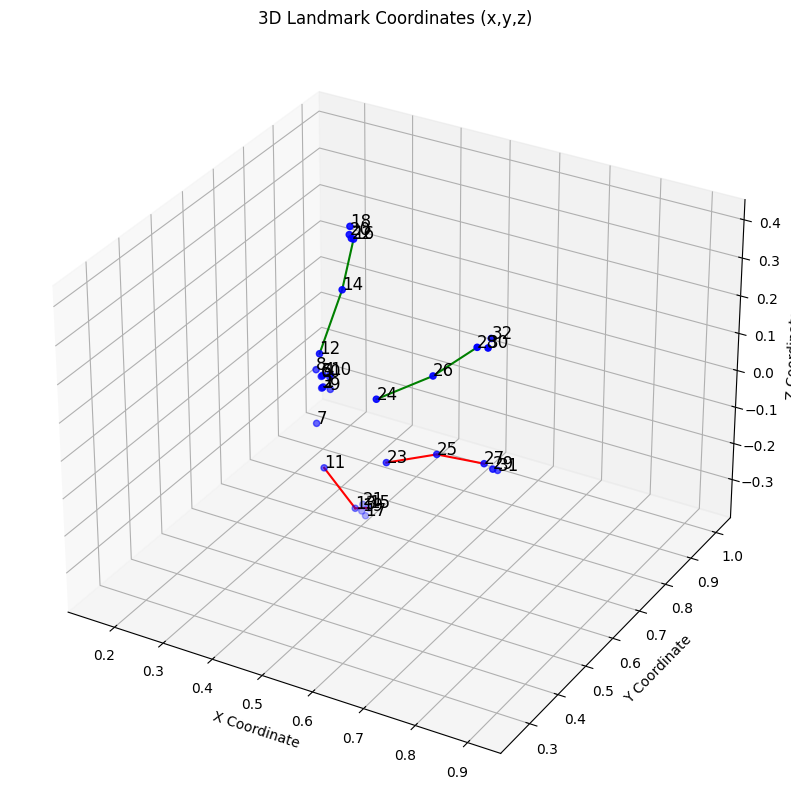

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]
hip_right = test_single[23]
knee_right = test_single[25]
ankle_right = test_single[27]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]
hip_left = test_single[24]
knee_left = test_single[26]
ankle_left = test_single[28]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Right leg lines (23-25 and 25-27)
x_line_rl1=[test_single[i][0] for i in [23,25]]
y_line_rl1=[test_single[i][1] for i in [23,25]]
z_line_rl1=[test_single[i][2] for i in [23,25]]

x_line_rl2=[test_single[i][0] for i in [25,27]]
y_line_rl2=[test_single[i][1] for i in [25,27]]
z_line_rl2=[test_single[i][2] for i in [25,27]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

# Left leg lines (24-26 and 26-28)
x_line_ll1=[test_single[i][0] for i in [24,26]]
y_line_ll1=[test_single[i][1] for i in [24,26]]
z_line_ll1=[test_single[i][2] for i in [24,26]]

x_line_ll2=[test_single[i][0] for i in [26,28]]
y_line_ll2=[test_single[i][1] for i in [26,28]]
z_line_ll2=[test_single[i][2] for i in [26,28]]

ax.plot(x_line_r1,y_line_r1,z_line_r1,c='r')
ax.plot(x_line_r2,y_line_r2,z_line_r2,c='r')
ax.plot(x_line_rl1,y_line_rl1,z_line_rl1,c='r')
ax.plot(x_line_rl2,y_line_rl2,z_line_rl2,c='r')
ax.plot(x_line_l1,y_line_l1,z_line_l1,c='g')
ax.plot(x_line_l2,y_line_l2,z_line_l2,c='g')
ax.plot(x_line_ll1,y_line_ll1,z_line_ll1,c='g')
ax.plot(x_line_ll2,y_line_ll2,z_line_ll2,c='g')

plt.grid(True)
plt.show()

Right arm:  [ 0.39690661  0.5799762  -0.16208142  0.9999795   0.99999559] [ 0.42765403  0.63408291 -0.298677    0.96195662  0.9998821 ] [ 0.41226372  0.70699018 -0.3555184   0.95219654  0.99999237]
Left arm:  [0.40382999 0.5576551  0.16110995 0.99981397 0.99997163] [0.42603487 0.59821671 0.31065267 0.00484799 0.9999578 ] [0.42216736 0.64407235 0.41214263 0.04539112 0.99999571]


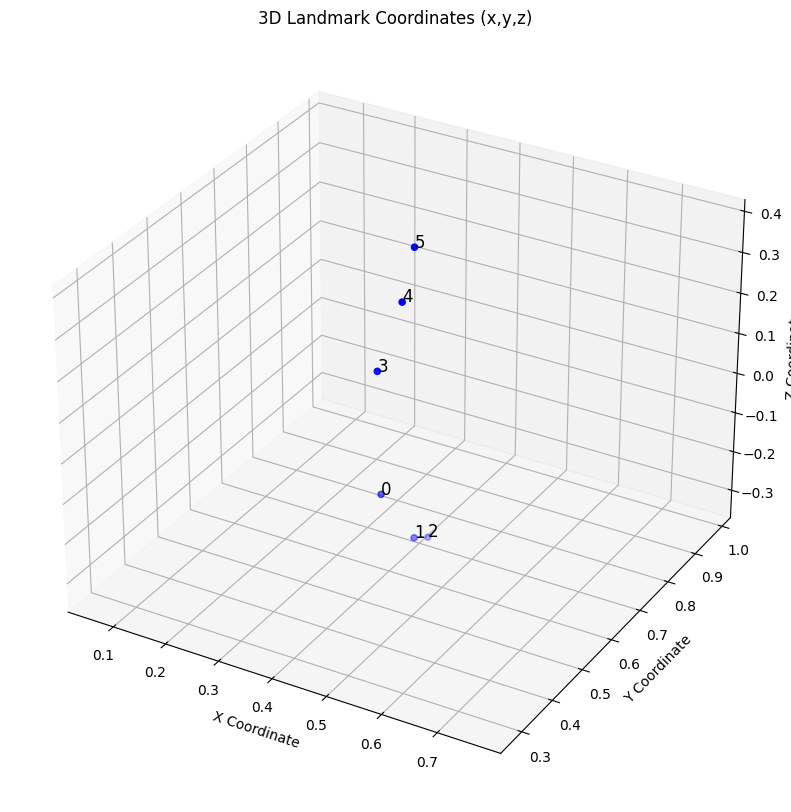

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
y_coords = [landmark[1] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
z_coords = [landmark[2] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
visibility = [landmark[3] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]
presence = [landmark[4] for landmark in [shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

plt.grid(True)
plt.show()

## X, Y 평면

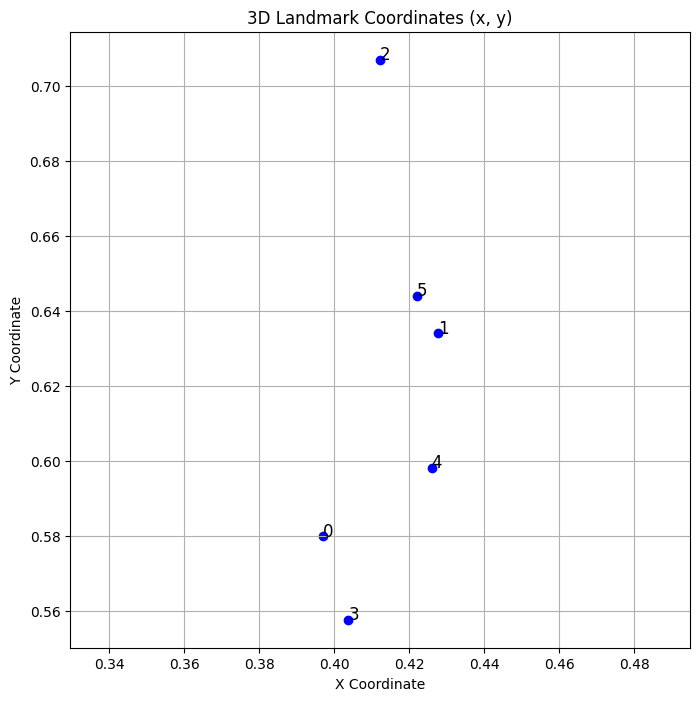

In [21]:
import matplotlib.pyplot as plt

# # 데이터 파싱
# x_coords = [landmark["x"] for landmark in test_single]
# y_coords = [landmark["y"] for landmark in test_single]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], y_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


In [22]:
import math

def calculate_xy_angle(a, b, c):
    # 벡터 생성
    ba = [a[0]-b[0], a[1]-b[1]] # 벡터 BA
    bc = [c[0]-b[0], c[1]-b[1]] # 벡터 BC

    # 내적 계산
    dot_product = ba[0]*bc[0] + ba[1]*bc[1]

    # 두 벡터의 크기 계산
    magnitude_ba = math.sqrt(ba[0]**2 + ba[1]**2)
    magnitude_bc = math.sqrt(bc[0]**2 + bc[1]**2)

    # cos(theta) 계산
    cos_theta = dot_product / (magnitude_ba * magnitude_bc)

    # acos(cos_theta)를 사용하여 theta(라디안 단위) 찾기, 그리고 degree로 변환 
    angle_in_degree = math.acos(cos_theta) * (180 / math.pi)

    return angle_in_degree

In [23]:
angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  138.47176135179745
Left arm angle:  146.48116138782007


## Y, Z 평면

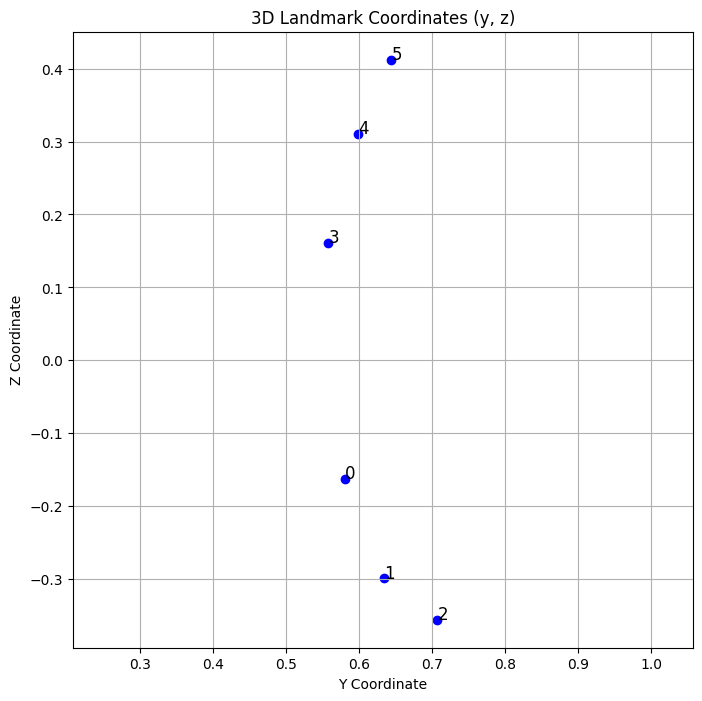

In [24]:
import matplotlib.pyplot as plt

# # 데이터 파싱
# x_coords = [landmark["x"] for landmark in test_single]
# y_coords = [landmark["y"] for landmark in test_single]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(y_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (y, z)')
plt.xlabel('Y Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (y_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


## X, Z 평면

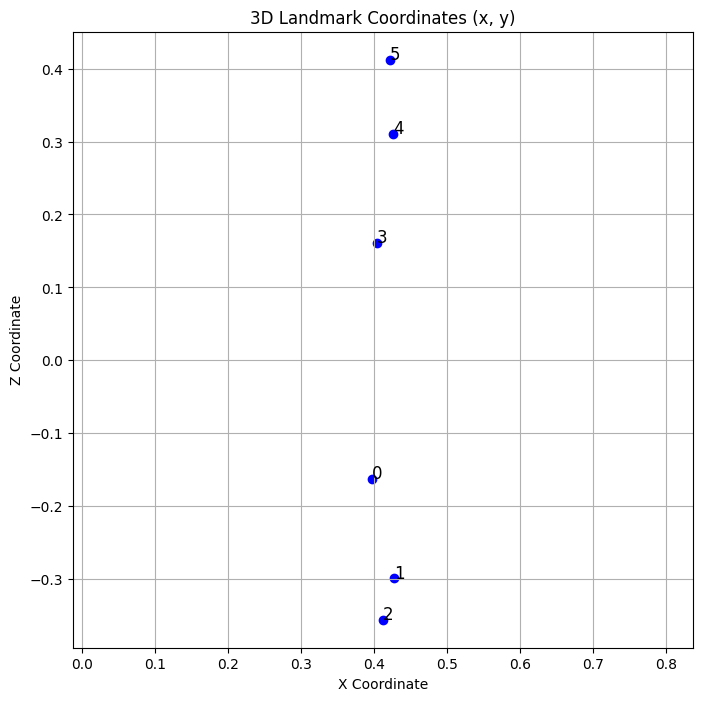

In [25]:
import matplotlib.pyplot as plt

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


## 각도 계산

In [26]:
import numpy as np

def calculate_angle(a, b, c):
    ba = a - b # vector from point b to a
    bc = c - b # vector from point b to c

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

In [27]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  142.70401762239297
Left arm angle:  78.70742845184857


In [28]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

xy_angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
xy_angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", xy_angle_right_arm)
print("Left arm angle: ", xy_angle_left_arm)

angle_right_leg= calculate_angle(hip_right, knee_right, ankle_right)
angle_left_leg= calculate_angle(hip_left, knee_left, ankle_left)

print("Right leg angle: ", angle_right_leg)
print("Left leg angle: ", angle_left_leg)

xy_angle_right_leg= calculate_xy_angle(hip_right[:-1], knee_right[:-1], ankle_right[:-1])
xy_angle_left_leg= calculate_xy_angle(hip_left[:-1], knee_left[:-1], ankle_left[:-1])

print("Right leg angle: ", xy_angle_right_leg)
print("Left leg angle: ", xy_angle_left_leg)

Right arm angle:  142.70401762239297
Left arm angle:  78.70742845184857
Right arm angle:  138.47176135179745
Left arm angle:  146.48116138782007
Right leg angle:  21.414964585422123
Left leg angle:  90.19332050330732
Right leg angle:  173.58746696817676
Left leg angle:  160.98970418905793


## 사진 2

In [22]:
test_single = np.load("561-1-3-27-Z115_C-0000001.jpg.npy")
test_single

array([[ 3.75849158e-01,  5.31037688e-01, -2.27283295e-02,
         9.99969482e-01,  9.99994278e-01],
       [ 3.67909074e-01,  5.21651566e-01, -4.37265299e-02,
         9.99954462e-01,  9.99992967e-01],
       [ 3.67931843e-01,  5.19217968e-01, -4.38894518e-02,
         9.99956131e-01,  9.99994040e-01],
       [ 3.67948532e-01,  5.17026603e-01, -4.38376889e-02,
         9.99969363e-01,  9.99992609e-01],
       [ 3.67576808e-01,  5.22094369e-01, -1.35040898e-02,
         9.99967456e-01,  9.99989867e-01],
       [ 3.67403835e-01,  5.19885361e-01, -1.37185482e-02,
         9.99970794e-01,  9.99990582e-01],
       [ 3.67168248e-01,  5.17615438e-01, -1.37591772e-02,
         9.99981046e-01,  9.99988556e-01],
       [ 3.69981170e-01,  4.97633129e-01, -1.02338307e-01,
         9.99962091e-01,  9.99992013e-01],
       [ 3.69794011e-01,  4.99540240e-01,  3.53462584e-02,
         9.99924660e-01,  9.99984264e-01],
       [ 3.83464038e-01,  5.24274170e-01, -3.85880247e-02,
         9.99886632e-01

Right arm:  [ 0.41391888  0.50330222 -0.1731452   0.99997306  0.99999404] [ 0.4202148   0.60913968 -0.21426846  0.98102242  0.99997807] [ 0.41804126  0.71003652 -0.18986337  0.98128223  0.99998188]
Left arm:  [0.42118084 0.48128551 0.1384699  0.99978524 0.99994707] [0.43036783 0.5706535  0.17476057 0.02360804 0.99994278] [0.42983052 0.65490198 0.08765715 0.14114091 0.99998963]


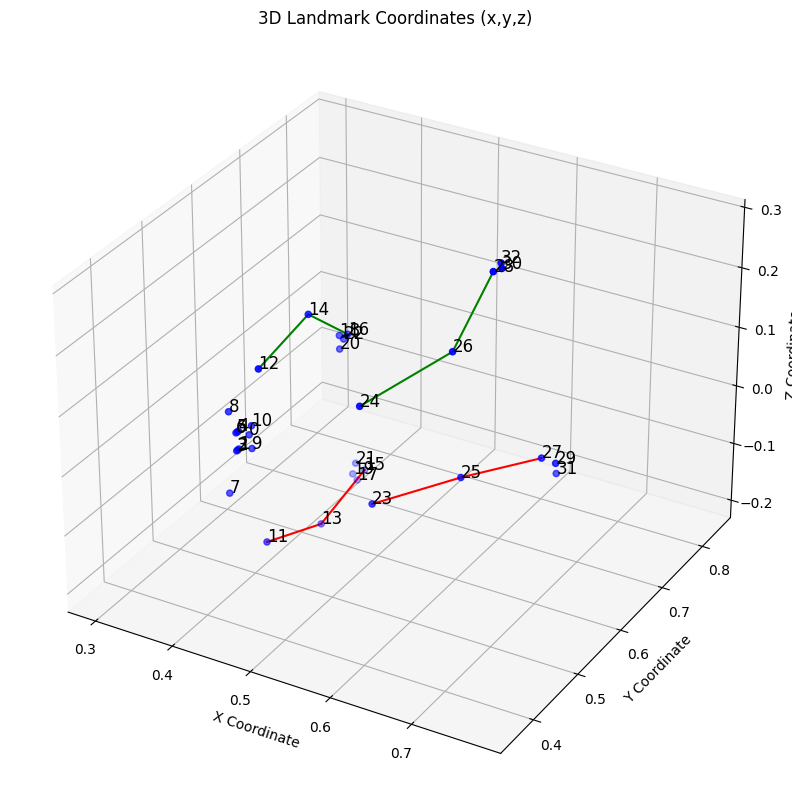

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]
hip_right = test_single[23]
knee_right = test_single[25]
ankle_right = test_single[27]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]
hip_left = test_single[24]
knee_left = test_single[26]
ankle_left = test_single[28]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Right leg lines (23-25 and 25-27)
x_line_rl1=[test_single[i][0] for i in [23,25]]
y_line_rl1=[test_single[i][1] for i in [23,25]]
z_line_rl1=[test_single[i][2] for i in [23,25]]

x_line_rl2=[test_single[i][0] for i in [25,27]]
y_line_rl2=[test_single[i][1] for i in [25,27]]
z_line_rl2=[test_single[i][2] for i in [25,27]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

# Left leg lines (24-26 and 26-28)
x_line_ll1=[test_single[i][0] for i in [24,26]]
y_line_ll1=[test_single[i][1] for i in [24,26]]
z_line_ll1=[test_single[i][2] for i in [24,26]]

x_line_ll2=[test_single[i][0] for i in [26,28]]
y_line_ll2=[test_single[i][1] for i in [26,28]]
z_line_ll2=[test_single[i][2] for i in [26,28]]

ax.plot(x_line_r1,y_line_r1,z_line_r1,c='r')
ax.plot(x_line_r2,y_line_r2,z_line_r2,c='r')
ax.plot(x_line_rl1,y_line_rl1,z_line_rl1,c='r')
ax.plot(x_line_rl2,y_line_rl2,z_line_rl2,c='r')
ax.plot(x_line_l1,y_line_l1,z_line_l1,c='g')
ax.plot(x_line_l2,y_line_l2,z_line_l2,c='g')
ax.plot(x_line_ll1,y_line_ll1,z_line_ll1,c='g')
ax.plot(x_line_ll2,y_line_ll2,z_line_ll2,c='g')

plt.grid(True)
plt.show()

Right arm:  [ 0.41391888  0.50330222 -0.1731452   0.99997306  0.99999404] [ 0.4202148   0.60913968 -0.21426846  0.98102242  0.99997807] [ 0.41804126  0.71003652 -0.18986337  0.98128223  0.99998188]
Left arm:  [0.42118084 0.48128551 0.1384699  0.99978524 0.99994707] [0.43036783 0.5706535  0.17476057 0.02360804 0.99994278] [0.42983052 0.65490198 0.08765715 0.14114091 0.99998963]


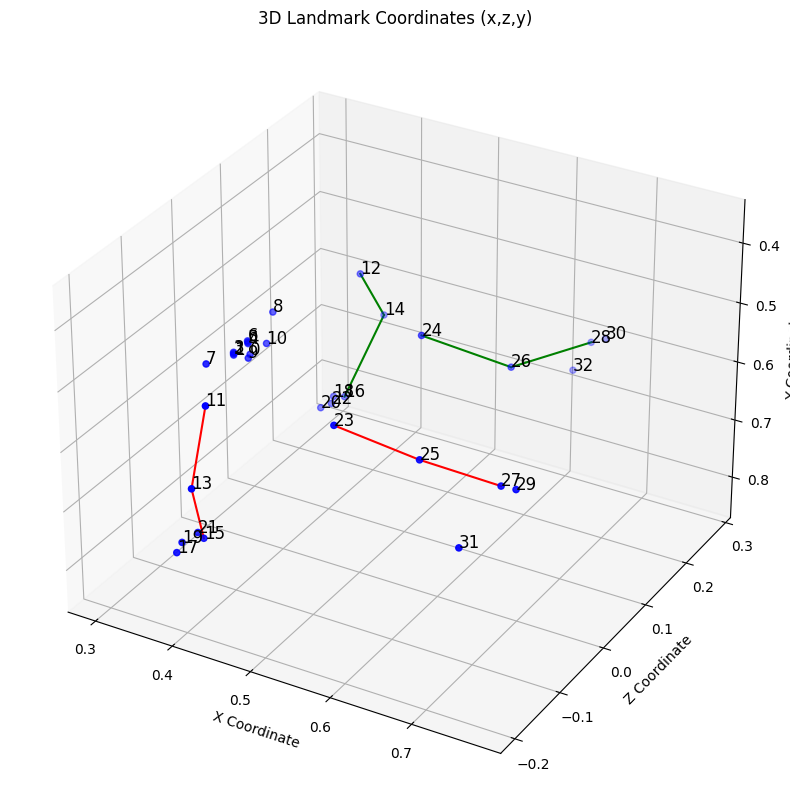

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]
hip_right = test_single[23]
knee_right = test_single[25]
ankle_right = test_single[27]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]
hip_left = test_single[24]
knee_left = test_single[26]
ankle_left = test_single[28]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,z_coords,y_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,z,y)')
ax.set_xlabel('X Coordinate')
ax.set_zlabel('Y Coordinate')
ax.set_ylabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_zlim(mid_y + max_range, mid_y - max_range)
ax.set_ylim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], z_coords[i], y_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Right leg lines (23-25 and 25-27)
x_line_rl1=[test_single[i][0] for i in [23,25]]
y_line_rl1=[test_single[i][1] for i in [23,25]]
z_line_rl1=[test_single[i][2] for i in [23,25]]

x_line_rl2=[test_single[i][0] for i in [25,27]]
y_line_rl2=[test_single[i][1] for i in [25,27]]
z_line_rl2=[test_single[i][2] for i in [25,27]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

# Left leg lines (24-26 and 26-28)
x_line_ll1=[test_single[i][0] for i in [24,26]]
y_line_ll1=[test_single[i][1] for i in [24,26]]
z_line_ll1=[test_single[i][2] for i in [24,26]]

x_line_ll2=[test_single[i][0] for i in [26,28]]
y_line_ll2=[test_single[i][1] for i in [26,28]]
z_line_ll2=[test_single[i][2] for i in [26,28]]

ax.plot(x_line_r1,z_line_r1,y_line_r1,c='r')
ax.plot(x_line_r2,z_line_r2,y_line_r2,c='r')
ax.plot(x_line_rl1,z_line_rl1,y_line_rl1,c='r')
ax.plot(x_line_rl2,z_line_rl2,y_line_rl2,c='r')
ax.plot(x_line_l1,z_line_l1,y_line_l1,c='g')
ax.plot(x_line_l2,z_line_l2,y_line_l2,c='g')
ax.plot(x_line_ll1,z_line_ll1,y_line_ll1,c='g')
ax.plot(x_line_ll2,z_line_ll2,y_line_ll2,c='g')

plt.grid(True)
plt.show()

In [12]:
[shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]

[array([ 0.41391888,  0.50330222, -0.1731452 ,  0.99997306,  0.99999404]),
 array([ 0.4202148 ,  0.60913968, -0.21426846,  0.98102242,  0.99997807]),
 array([ 0.41804126,  0.71003652, -0.18986337,  0.98128223,  0.99998188]),
 array([0.42118084, 0.48128551, 0.1384699 , 0.99978524, 0.99994707]),
 array([0.43036783, 0.5706535 , 0.17476057, 0.02360804, 0.99994278]),
 array([0.42983052, 0.65490198, 0.08765715, 0.14114091, 0.99998963])]

Right arm:  [ 0.41391888  0.50330222 -0.1731452   0.99997306  0.99999404] [ 0.4202148   0.60913968 -0.21426846  0.98102242  0.99997807] [ 0.41804126  0.71003652 -0.18986337  0.98128223  0.99998188]
Left arm:  [0.42118084 0.48128551 0.1384699  0.99978524 0.99994707] [0.43036783 0.5706535  0.17476057 0.02360804 0.99994278] [0.42983052 0.65490198 0.08765715 0.14114091 0.99998963]


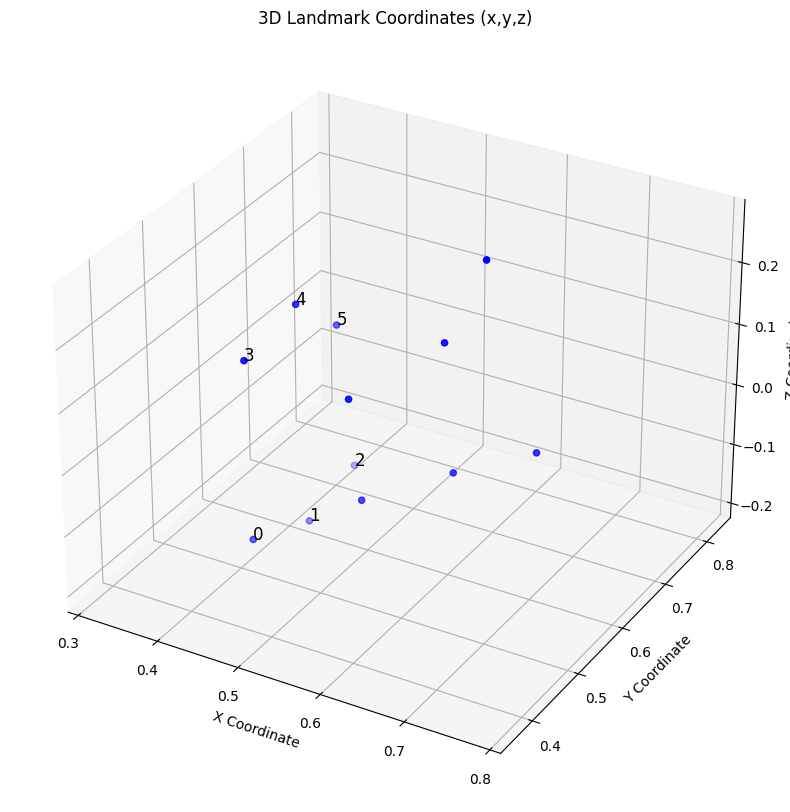

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

indexs = [11, 13, 15, 12, 14, 16, 23, 25, 27, 24, 26, 28]
arms_and_legs = test_single[indexs]

# 데이터 파싱
x_coords = [landmark[0] for landmark in arms_and_legs]
y_coords = [landmark[1] for landmark in arms_and_legs]
z_coords = [landmark[2] for landmark in arms_and_legs]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

plt.grid(True)
plt.show()

## X, Y 평면

[ 0.41391888  0.50330222 -0.1731452   0.99997306  0.99999404]
[ 0.4202148   0.60913968 -0.21426846  0.98102242  0.99997807]
[ 0.41804126  0.71003652 -0.18986337  0.98128223  0.99998188]
[0.42118084 0.48128551 0.1384699  0.99978524 0.99994707]
[0.43036783 0.5706535  0.17476057 0.02360804 0.99994278]
[0.42983052 0.65490198 0.08765715 0.14114091 0.99998963]
[ 0.52444011  0.54631835 -0.0926408   0.99994636  0.99999559]
[ 0.60636592  0.59943229 -0.05130062  0.85067964  0.9999845 ]
[ 0.68565023  0.63784766 -0.01329866  0.94524139  0.9998945 ]
[0.52626115 0.51775301 0.09257066 0.99989212 0.99999511]
[0.6003952  0.58964372 0.16370584 0.02922642 0.99998689]
[0.63478386 0.61599427 0.29006645 0.06695446 0.99996638]


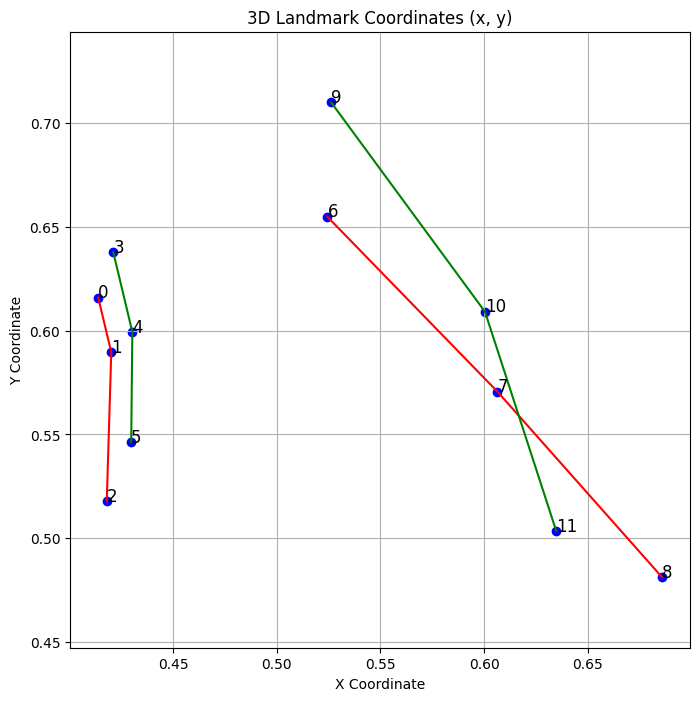

In [35]:
import matplotlib.pyplot as plt

indexs = [11, 13, 15, 12, 14, 16, 23, 25, 27, 24, 26, 28]
arms_and_legs = test_single[indexs]

# 데이터 파싱
x_coords = [landmark[0] for landmark in arms_and_legs]
y_coords = [landmark[1] for landmark in arms_and_legs][::-1]
z_coords = [landmark[2] for landmark in arms_and_legs]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate(arms_and_legs):
    print(landmark)
    plt.annotate(i, (x_coords[i], y_coords[i]), fontsize=12)

plt.plot(x_coords[:3], y_coords[:3], 'r-') # 왼쪽 팔
plt.plot(x_coords[3:6], y_coords[3:6], 'g-') # 오른쪽 팔
plt.plot(x_coords[6:9], y_coords[6:9], 'r-') # 왼쪽 다리
plt.plot(x_coords[9:], y_coords[9:], 'g-') # 오른쪽 다리

# 그래프 표시
plt.grid(True)
plt.axis('equal')
plt.show()


In [105]:
import math

def calculate_xy_angle(a, b, c):
    # 벡터 생성
    ba = [a[0]-b[0], a[1]-b[1]] # 벡터 BA
    bc = [c[0]-b[0], c[1]-b[1]] # 벡터 BC

    # 내적 계산
    dot_product = ba[0]*bc[0] + ba[1]*bc[1]

    # 두 벡터의 크기 계산
    magnitude_ba = math.sqrt(ba[0]**2 + ba[1]**2)
    magnitude_bc = math.sqrt(bc[0]**2 + bc[1]**2)

    # cos(theta) 계산
    cos_theta = dot_product / (magnitude_ba * magnitude_bc)

    # acos(cos_theta)를 사용하여 theta(라디안 단위) 찾기, 그리고 degree로 변환 
    angle_in_degree = math.acos(cos_theta) * (180 / math.pi)

    return angle_in_degree

In [107]:
angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  175.36158801402746
Left arm angle:  173.7652339670461


## Y, Z 평면

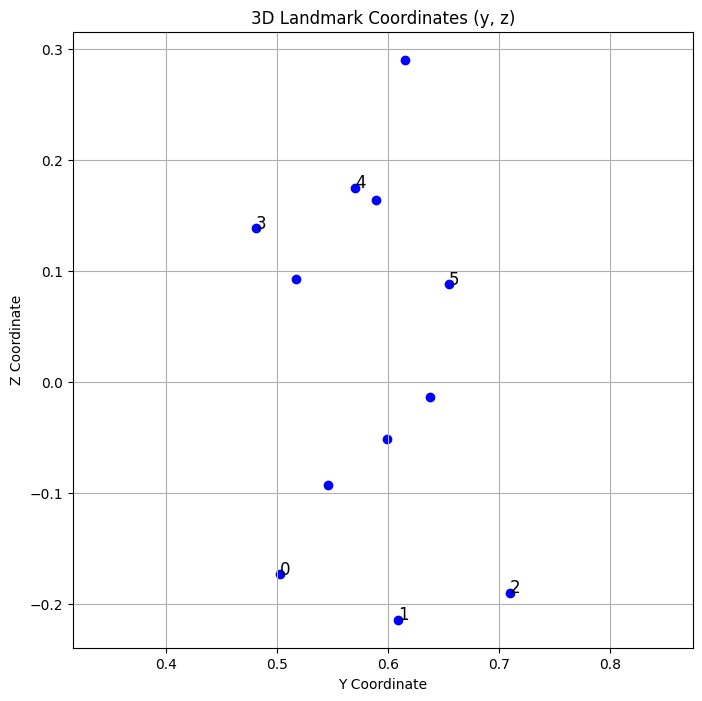

In [21]:
import matplotlib.pyplot as plt

# # 데이터 파싱
# x_coords = [landmark["x"] for landmark in test_single]
# y_coords = [landmark["y"] for landmark in test_single]

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(y_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (y, z)')
plt.xlabel('Y Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (y_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


## X, Z 평면

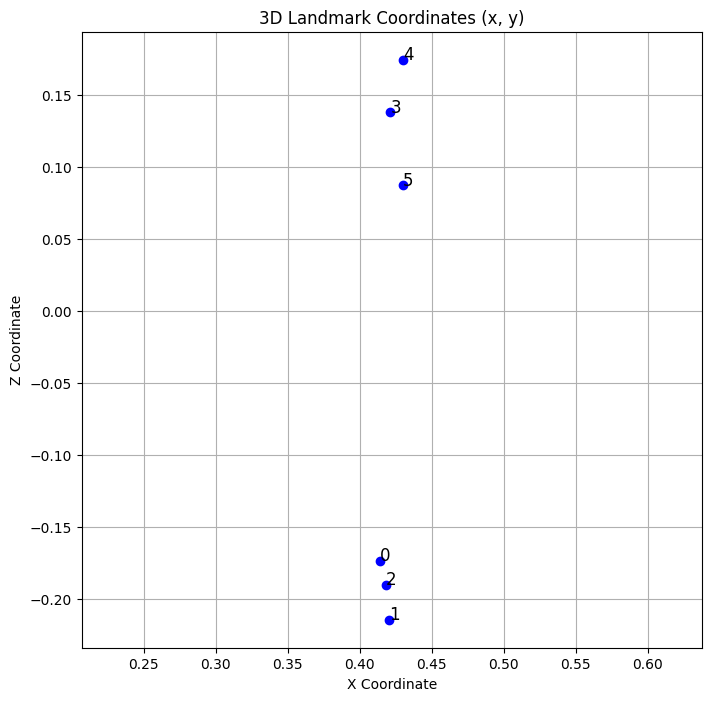

In [102]:
import matplotlib.pyplot as plt

# 산점도 (scatter plot) 그리기
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, z_coords, c='b', marker='o')
plt.title('3D Landmark Coordinates (x, y)')
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')

# 각 점에 랜드마크 이름 추가
for i, landmark in enumerate([shoulder_right, elbow_right, wrist_right, shoulder_left, elbow_left, wrist_left]):
    plt.annotate(i, (x_coords[i], z_coords[i]), fontsize=12)

# 그래프 표시
plt.grid(True)
plt.axis('equal') 
plt.show()


In [106]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

Right arm angle:  175.36158801402746
Left arm angle:  173.7652339670461


In [32]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

xy_angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
xy_angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", xy_angle_right_arm)
print("Left arm angle: ", xy_angle_left_arm)

angle_right_leg= calculate_angle(hip_right, knee_right, ankle_right)
angle_left_leg= calculate_angle(hip_left, knee_left, ankle_left)

print("Right leg angle: ", angle_right_leg)
print("Left leg angle: ", angle_left_leg)

xy_angle_right_leg= calculate_xy_angle(hip_right[:-1], knee_right[:-1], ankle_right[:-1])
xy_angle_left_leg= calculate_xy_angle(hip_left[:-1], knee_left[:-1], ankle_left[:-1])

print("Right leg angle: ", xy_angle_right_leg)
print("Left leg angle: ", xy_angle_left_leg)

Right arm angle:  143.7743597910173
Left arm angle:  48.20519999491605
Right arm angle:  175.36158801402746
Left arm angle:  173.7652339670461
Right leg angle:  80.64788318301399
Left leg angle:  80.1721205768521
Right leg angle:  172.89538330062763
Left leg angle:  173.34154990985448


# 다리가 구부러진 이미지

In [2]:
import pandas as pd
import numpy as np

In [3]:
test_single = np.load("561-1-3-27-Z115_C-0000032.jpg.npy")
test_single

array([[ 0.36223686,  0.50466764, -0.10804423,  1.        ,  1.        ],
       [ 0.35778093,  0.48998317, -0.11264537,  1.        ,  1.        ],
       [ 0.3590917 ,  0.48635769, -0.11277232,  1.        ,  1.        ],
       [ 0.36038685,  0.48285848, -0.11271319,  1.        ,  1.        ],
       [ 0.35611102,  0.4940055 , -0.08771212,  1.        ,  1.        ],
       [ 0.35578388,  0.49448538, -0.08789367,  1.        ,  1.        ],
       [ 0.35530585,  0.49543247, -0.08789622,  1.        ,  1.        ],
       [ 0.36966848,  0.46885577, -0.09678955,  1.        ,  1.        ],
       [ 0.36249429,  0.48789909,  0.01518266,  0.99999988,  0.99999988],
       [ 0.37084746,  0.50377822, -0.09765764,  0.99999964,  0.99999988],
       [ 0.36965126,  0.50907636, -0.06678127,  0.99999964,  0.99999988],
       [ 0.40236983,  0.50097811, -0.14375818,  0.99999523,  0.99999917],
       [ 0.41249365,  0.48591548,  0.15032953,  0.99995863,  0.99999321],
       [ 0.41376078,  0.60491818, -0.1

Right arm:  [ 0.40236983  0.50097811 -0.14375818  0.99999523  0.99999917] [ 0.41376078  0.60491818 -0.17484248  0.99455935  0.99998283] [ 0.4163399   0.70549452 -0.16012149  0.99638712  0.99999082]
Left arm:  [0.41249365 0.48591548 0.15032953 0.99995863 0.99999321] [0.42878178 0.57498837 0.16133592 0.07005514 0.99994767] [0.42939532 0.65456343 0.03226024 0.53052545 0.99999034]


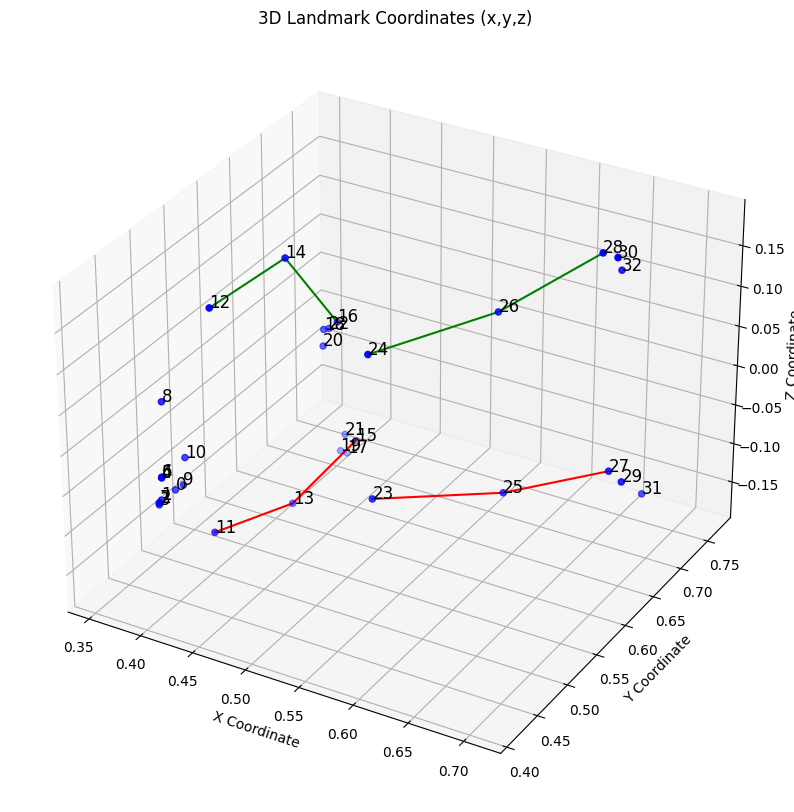

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]
hip_right = test_single[23]
knee_right = test_single[25]
ankle_right = test_single[27]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]
hip_left = test_single[24]
knee_left = test_single[26]
ankle_left = test_single[28]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,y_coords,z_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,y,z)')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_ylim(mid_y - max_range,mid_y + max_range)
ax.set_zlim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], y_coords[i], z_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Right leg lines (23-25 and 25-27)
x_line_rl1=[test_single[i][0] for i in [23,25]]
y_line_rl1=[test_single[i][1] for i in [23,25]]
z_line_rl1=[test_single[i][2] for i in [23,25]]

x_line_rl2=[test_single[i][0] for i in [25,27]]
y_line_rl2=[test_single[i][1] for i in [25,27]]
z_line_rl2=[test_single[i][2] for i in [25,27]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

# Left leg lines (24-26 and 26-28)
x_line_ll1=[test_single[i][0] for i in [24,26]]
y_line_ll1=[test_single[i][1] for i in [24,26]]
z_line_ll1=[test_single[i][2] for i in [24,26]]

x_line_ll2=[test_single[i][0] for i in [26,28]]
y_line_ll2=[test_single[i][1] for i in [26,28]]
z_line_ll2=[test_single[i][2] for i in [26,28]]

ax.plot(x_line_r1,y_line_r1,z_line_r1,c='r')
ax.plot(x_line_r2,y_line_r2,z_line_r2,c='r')
ax.plot(x_line_rl1,y_line_rl1,z_line_rl1,c='r')
ax.plot(x_line_rl2,y_line_rl2,z_line_rl2,c='r')
ax.plot(x_line_l1,y_line_l1,z_line_l1,c='g')
ax.plot(x_line_l2,y_line_l2,z_line_l2,c='g')
ax.plot(x_line_ll1,y_line_ll1,z_line_ll1,c='g')
ax.plot(x_line_ll2,y_line_ll2,z_line_ll2,c='g')

plt.grid(True)
plt.show()

Right arm:  [ 0.40236983  0.50097811 -0.14375818  0.99999523  0.99999917] [ 0.41376078  0.60491818 -0.17484248  0.99455935  0.99998283] [ 0.4163399   0.70549452 -0.16012149  0.99638712  0.99999082]
Left arm:  [0.41249365 0.48591548 0.15032953 0.99995863 0.99999321] [0.42878178 0.57498837 0.16133592 0.07005514 0.99994767] [0.42939532 0.65456343 0.03226024 0.53052545 0.99999034]


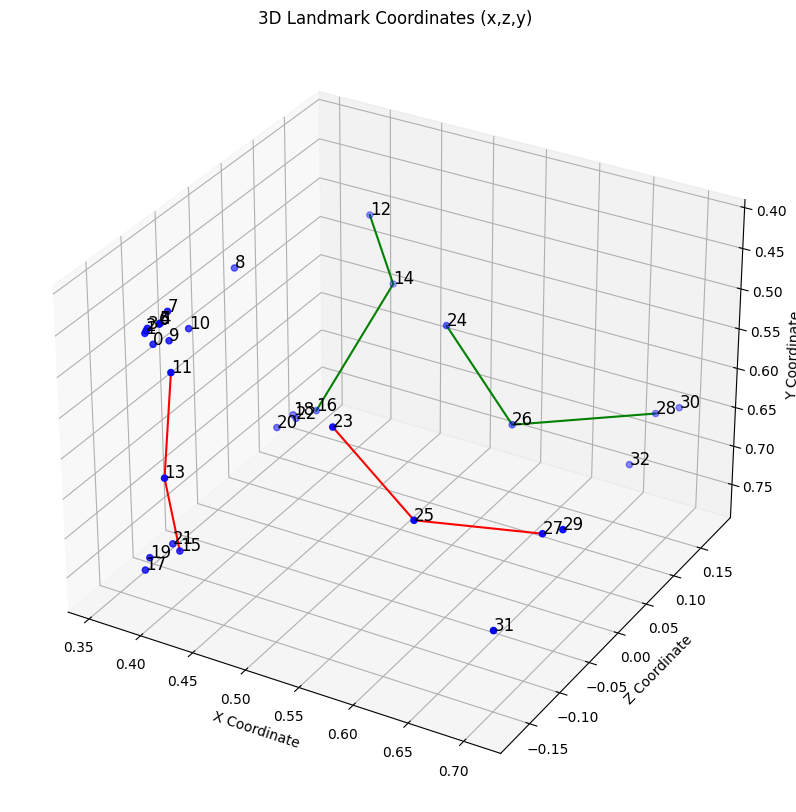

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shoulder_right = test_single[11]
elbow_right = test_single[13]
wrist_right = test_single[15]
hip_right = test_single[23]
knee_right = test_single[25]
ankle_right = test_single[27]

# Left arm
shoulder_left = test_single[12]
elbow_left = test_single[14]
wrist_left= test_single[16]
hip_left = test_single[24]
knee_left = test_single[26]
ankle_left = test_single[28]

print("Right arm: ", shoulder_right, elbow_right, wrist_right)
print("Left arm: ", shoulder_left, elbow_left, wrist_left)

# 데이터 파싱
x_coords = [landmark[0] for landmark in test_single]
y_coords = [landmark[1] for landmark in test_single]
z_coords = [landmark[2] for landmark in test_single]

# 3D 산점도 그리기
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_coords,z_coords,y_coords,c='b',marker='o')
ax.set_title('3D Landmark Coordinates (x,z,y)')
ax.set_xlabel('X Coordinate')
ax.set_zlabel('Y Coordinate')
ax.set_ylabel('Z Coordinate')

max_range=np.array([max(x_coords)-min(x_coords), max(y_coords)-min(y_coords), max(z_coords)-min(z_coords)]).max() / 2.0

mid_x=(max(x_coords)+min(x_coords)) * 0.5
mid_y=(max(y_coords)+min(y_coords)) * 0.5
mid_z=(max(z_coords)+min(z_coords)) * 0.5

ax.set_xlim(mid_x - max_range,mid_x + max_range)
ax.set_zlim(mid_y + max_range, mid_y - max_range)
ax.set_ylim(mid_z - max_range,mid_z + max_range)

for i , landmark in enumerate(test_single):
    ax.text(x_coords[i], z_coords[i], y_coords[i], str(i), fontsize=12)

# Right arm lines (11-13 and 13-15)
x_line_r1=[test_single[i][0] for i in [11,13]]
y_line_r1=[test_single[i][1] for i in [11,13]]
z_line_r1=[test_single[i][2] for i in [11,13]]

x_line_r2=[test_single[i][0] for i in [13,15]]
y_line_r2=[test_single[i][1] for i in [13,15]]
z_line_r2=[test_single[i][2] for i in [13,15]]

# Right leg lines (23-25 and 25-27)
x_line_rl1=[test_single[i][0] for i in [23,25]]
y_line_rl1=[test_single[i][1] for i in [23,25]]
z_line_rl1=[test_single[i][2] for i in [23,25]]

x_line_rl2=[test_single[i][0] for i in [25,27]]
y_line_rl2=[test_single[i][1] for i in [25,27]]
z_line_rl2=[test_single[i][2] for i in [25,27]]

# Left arm lines (12-14 and 14-16)
x_line_l1=[test_single[i][0] for i in [12,14]]
y_line_l1=[test_single[i][1] for i in [12,14]]
z_line_l1=[test_single[i][2] for i in [12,14]]

x_line_l2=[test_single[i][0] for i in [14,16]]
y_line_l2=[test_single[i][1] for i in [14,16]]
z_line_l2=[test_single[i][2] for i in [14,16]]

# Left leg lines (24-26 and 26-28)
x_line_ll1=[test_single[i][0] for i in [24,26]]
y_line_ll1=[test_single[i][1] for i in [24,26]]
z_line_ll1=[test_single[i][2] for i in [24,26]]

x_line_ll2=[test_single[i][0] for i in [26,28]]
y_line_ll2=[test_single[i][1] for i in [26,28]]
z_line_ll2=[test_single[i][2] for i in [26,28]]

ax.plot(x_line_r1,z_line_r1,y_line_r1,c='r')
ax.plot(x_line_r2,z_line_r2,y_line_r2,c='r')
ax.plot(x_line_rl1,z_line_rl1,y_line_rl1,c='r')
ax.plot(x_line_rl2,z_line_rl2,y_line_rl2,c='r')
ax.plot(x_line_l1,z_line_l1,y_line_l1,c='g')
ax.plot(x_line_l2,z_line_l2,y_line_l2,c='g')
ax.plot(x_line_ll1,z_line_ll1,y_line_ll1,c='g')
ax.plot(x_line_ll2,z_line_ll2,y_line_ll2,c='g')

plt.grid(True)
plt.show()

In [6]:
import numpy as np

def calculate_angle(a, b, c):
    ba = a - b # vector from point b to a
    bc = c - b # vector from point b to c

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    return np.degrees(angle)

import math

def calculate_xy_angle(a, b, c):
    # 벡터 생성
    ba = [a[0]-b[0], a[1]-b[1]] # 벡터 BA
    bc = [c[0]-b[0], c[1]-b[1]] # 벡터 BC

    # 내적 계산
    dot_product = ba[0]*bc[0] + ba[1]*bc[1]

    # 두 벡터의 크기 계산
    magnitude_ba = math.sqrt(ba[0]**2 + ba[1]**2)
    magnitude_bc = math.sqrt(bc[0]**2 + bc[1]**2)

    # cos(theta) 계산
    cos_theta = dot_product / (magnitude_ba * magnitude_bc)

    # acos(cos_theta)를 사용하여 theta(라디안 단위) 찾기, 그리고 degree로 변환 
    angle_in_degree = math.acos(cos_theta) * (180 / math.pi)

    return angle_in_degree

In [12]:
angle_right_arm= calculate_angle(shoulder_right, elbow_right, wrist_right)
angle_left_arm= calculate_angle(shoulder_left, elbow_left, wrist_left)

print("Right arm angle: ", angle_right_arm)
print("Left arm angle: ", angle_left_arm)

xy_angle_right_arm= calculate_xy_angle(shoulder_right[:-1], elbow_right[:-1], wrist_right[:-1])
xy_angle_left_arm= calculate_xy_angle(shoulder_left[:-1], elbow_left[:-1], wrist_left[:-1])

print("Right arm angle: ", xy_angle_right_arm)
print("Left arm angle: ", xy_angle_left_arm)

Right arm angle:  154.38518889137052
Left arm angle:  21.131597219033573
Right arm angle:  175.2147633363077
Left arm angle:  170.07897185204823


In [13]:
# hip_right = test_single[23]
# knee_right = test_single[25]
# ankle_right = test_single[27]

# hip_left = test_single[24]
# knee_left = test_single[26]
# ankle_left = test_single[28]

angle_right_leg= calculate_angle(hip_right, knee_right, ankle_right)
angle_left_leg= calculate_angle(hip_left, knee_left, ankle_left)

print("Right leg angle: ", angle_right_leg)
print("Left leg angle: ", angle_left_leg)

xy_angle_right_leg= calculate_xy_angle(hip_right[:-1], knee_right[:-1], ankle_right[:-1])
xy_angle_left_leg= calculate_xy_angle(hip_left[:-1], knee_left[:-1], ankle_left[:-1])

print("Right leg angle: ", xy_angle_right_leg)
print("Left leg angle: ", xy_angle_left_leg)

Right leg angle:  130.6484624048932
Left leg angle:  34.86690740712166
Right leg angle:  148.2733817107476
Left leg angle:  128.9762828422024
